In [9]:
### Pandas + Visualization Project

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the Data
df = pd.read_csv(r'C:\Users\Prakhyat Mishra\Desktop\Python project\Customer Purchases Project\customer_purchases.csv')

In [11]:
# 3. Basic Exploration
print(df.head())
print(df.info())
print(df.describe())


   Customer_ID  Product_ID     Category  Purchase_Amount Purchase_Date  \
0         4174         104  Electronics           261.05    2023-04-12   
1         4507         132         Toys           222.90    2023-08-29   
2         1860         164    Groceries            77.99    2023-11-17   
3         2294         117         Toys           167.46    2023-07-10   
4         2130         195          NaN           219.84    2023-08-05   

     Payment_Method  
0  Cash On Delivery  
1               UPI  
2  Cash On Delivery  
3       Credit Card  
4       Credit Card  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      1000 non-null   int64  
 1   Product_ID       1000 non-null   int64  
 2   Category         950 non-null    object 
 3   Purchase_Amount  1000 non-null   float64
 4   Purchase_Date    1000 non-null   obje

In [12]:
# 4. Handling Missing Values
df['Category'] = df['Category'].fillna('Others')
df['Payment_Method'] = df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])
print(df.isnull().sum())

Customer_ID        0
Product_ID         0
Category           0
Purchase_Amount    0
Purchase_Date      0
Payment_Method     0
dtype: int64


In [13]:
# 5. Feature Engineering
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Purchase_Month'] = df['Purchase_Date'].dt.month
df['Amount_Category'] = pd.cut(df['Purchase_Amount'], 
                                bins=[0, 100, 300, 500], 
                                labels=['Low', 'Medium', 'High'])

In [14]:
# 6. Group By and Aggregations
category_summary = df.groupby('Category')['Purchase_Amount'].agg(['count', 'mean', 'sum']).reset_index()
payment_pivot = pd.pivot_table(df, values='Purchase_Amount', 
                               index='Payment_Method', 
                               columns='Category', 
                               aggfunc='sum', fill_value=0)
print(category_summary)
print(payment_pivot)

      Category  count        mean       sum
0        Books    215  239.086233  51403.54
1     Clothing    199  255.561608  50856.76
2  Electronics    177  252.521864  44696.37
3    Groceries    164  262.275671  43013.21
4       Others     50  267.874000  13393.70
5         Toys    195  245.539333  47880.17
Category             Books  Clothing  Electronics  Groceries   Others  \
Payment_Method                                                          
Cash On Delivery  11437.78   9975.61     12817.90   14589.29  5008.45   
Credit Card        8806.53  11419.27      5829.72    6186.47  1216.29   
Debit Card         9871.47  12715.64      7290.37    4276.45  2747.28   
Net Banking       10033.66  10010.62      7396.10    9209.92  2712.59   
UPI               11254.10   6735.62     11362.28    8751.08  1709.09   

Category              Toys  
Payment_Method              
Cash On Delivery  10075.09  
Credit Card        8573.49  
Debit Card         8389.63  
Net Banking       12286.35  
UPI   

In [8]:
# 7. Save Cleaned Data
df.to_csv(r'C:\Users\Prakhyat Mishra\Desktop\Python project\Customer Purchases Project\customer_purchases_cleaned.csv', index=False)

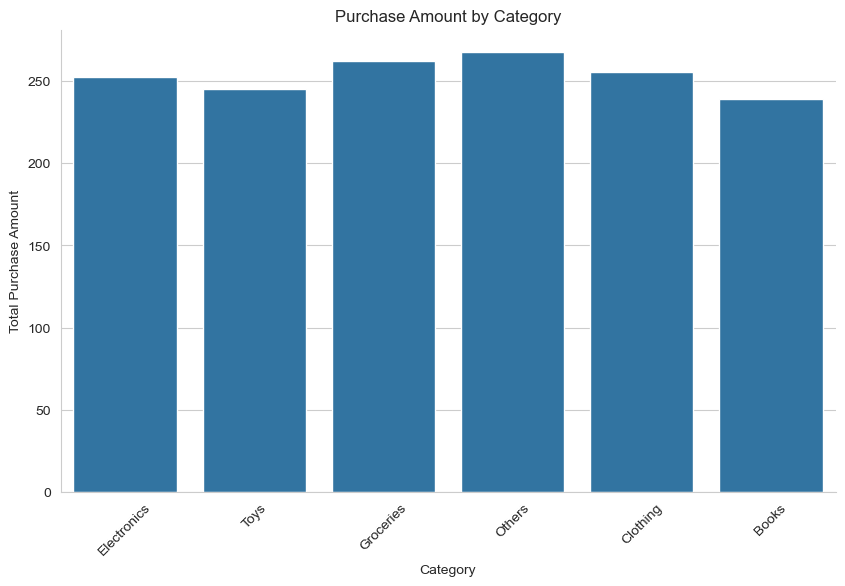

In [22]:
# 8. Basic Visualizations

# Set style
sns.set_style('whitegrid')

# Barplot: Purchase Amount by Category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Purchase_Amount', data=df, errorbar=None)
sns.despine()
plt.title('Purchase Amount by Category')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

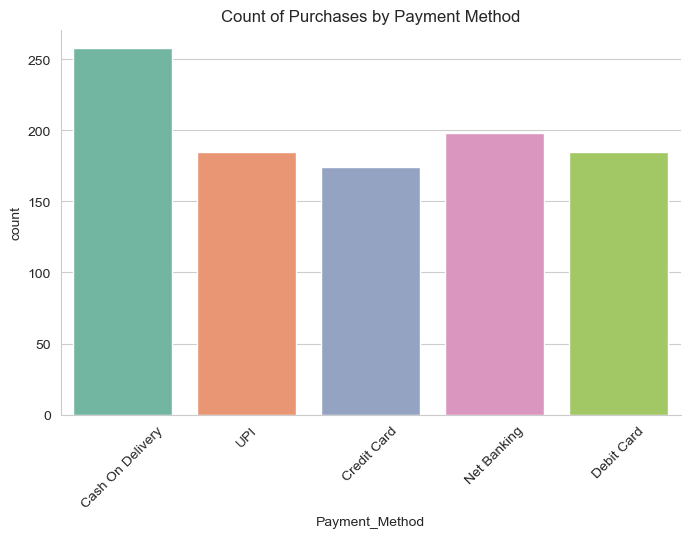

In [21]:
# Countplot: Payment Method
plt.figure(figsize=(8,5))
sns.countplot(x='Payment_Method', data=df, palette='Set2', hue="Payment_Method")
sns.despine()
plt.title('Count of Purchases by Payment Method')
plt.xticks(rotation=45)
plt.show()

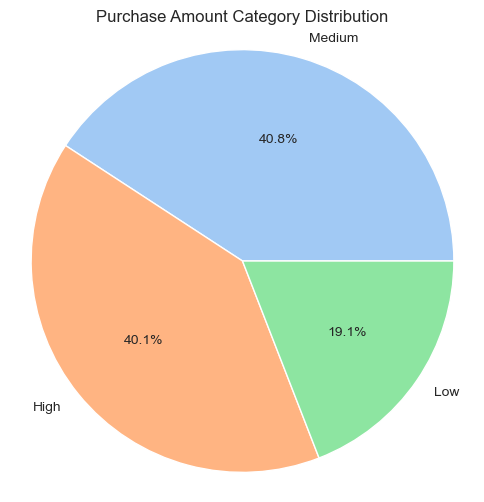

In [25]:
# Pie Chart: Distribution by Amount Category
amount_dist = df['Amount_Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(amount_dist, labels=amount_dist.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Purchase Amount Category Distribution')
plt.axis('equal')
plt.show()

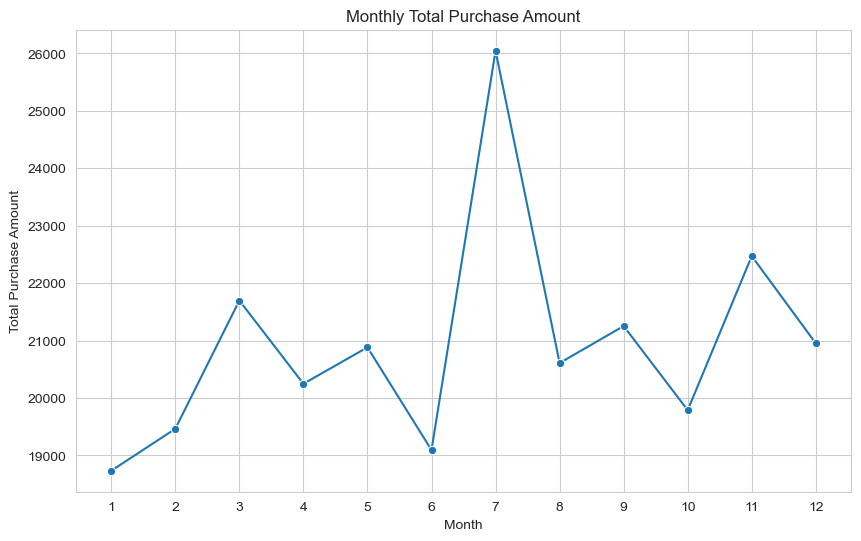

In [36]:
# Line Chart: Total Purchase Amount per Month
monthly_sales = df.groupby('Purchase_Month')['Purchase_Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Purchase_Month', y='Purchase_Amount', data=monthly_sales, marker='o')
plt.title('Monthly Total Purchase Amount')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(monthly_sales['Purchase_Month'])
plt.grid(True)
plt.show()

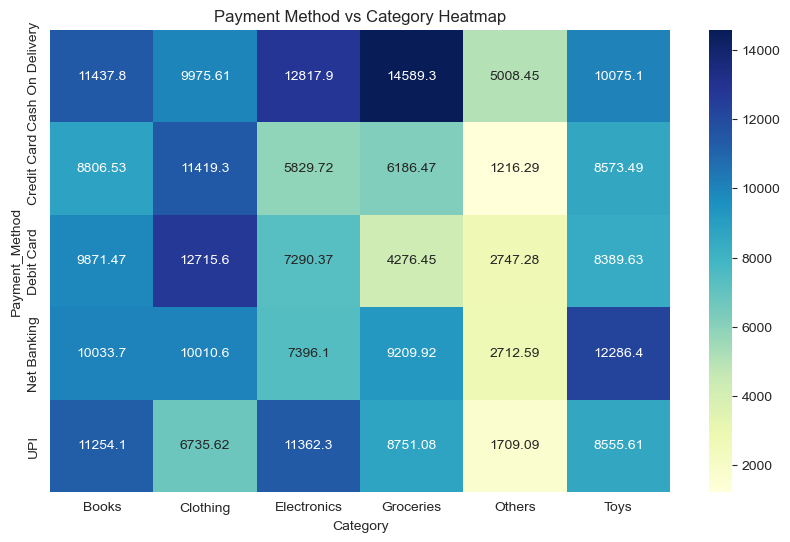

In [34]:
# 9. Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(payment_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Payment Method vs Category Heatmap')
plt.show()